In [16]:
import numpy as np
import matplotlib.pyplot as plt
from dnn_app_utils_v3 import load_data
import copy
from utils.l_layer_application_utils import *

In [17]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [18]:
train_x_orig.shape

(209, 64, 64, 3)

In [19]:
train_x = train_x_orig.reshape(train_x_orig.shape[0],-1).T / 255.
test_x = test_x_orig.reshape(test_x_orig.shape[0],-1).T / 255.
print(train_x.shape)
print(test_x.shape)

(12288, 209)
(12288, 50)


In [20]:
class LLayerModel:
    def __init__(self, train_x, train_y):
        self.train_x = train_x
        self.train_y = train_y
        self.learning_rate = None
        self.parameters = None
        self.layer_dims = None
        self.costs = []

    def make_layer_dims(self, layer_dims = None, L = None, hidden_units = None):
        if is_valid_layerdims(layer_dims):
            self.layer_dims = [self.train_x.shape[0]] + layer_dims + [self.train_y.shape[0]]
        elif layer_dims is None and isinstance(L, int) and isinstance(hidden_units, int) and L > 0 and hidden_units > 0:
            self.layer_dims = [self.train_x.shape[0]] + [hidden_units] * L + [self.train_y.shape[0]]
        else : 
            raise ValueError("you should specify layers correctly")
    
    def train(self, iterations= 3000, lr = None ,print_cost = True, plot_cost = True, ):
        if self.layer_dims is None:
            raise ValueError("you should set layer_dims first. use 'Model.make_layer_dims(layer_dims)' first")
        self.parameters = initialize_parameters_deep(self.layer_dims)
        if isinstance(lr, float):
            self.learning_rate = lr
        for i in range(iterations):
            AL, caches = forward(self.train_x, self.parameters)
            cost = compute_cost(AL, self.train_y)
            self.costs.append(cost)
            if print_cost and (i+1) % 100 ==0:
                accuracy = 1- np.mean(np.abs(AL - train_y))
                print(f"iteration {i+1} /  accuracy:{accuracy * 100}%")
                print('cost: ',cost)
            grads = L_model_backward(AL, self.train_y, caches)
            self.parameters = update_params(self.parameters, grads, self.learning_rate)
        if plot_cost:
            plot_costs(self.costs, self.learning_rate)

    def predict(self, test_x, test_y):
        y_hat, _ = forward(test_x, self.parameters)
        cost = compute_cost(y_hat, test_y)
        accuracy = 1 - np.mean(np.abs(y_hat - test_y))
        print("acc",accuracy * 100,"%")
        print("cost:", cost)
        
    
    def meow(n):
        print("meow " * n)

In [21]:
#HOW TO USE 
'''
nlp = LLayerModel(train_x,train_y)
nlp.make_layer_dims([20,7,5,2]) or nlp.make_layer_dims(L = 4, hidden_units = 20)
nlp.train(iterations, lr)
nlp.predict(test_x,test_y)

train_x.shape = (-1, m)
'''

'\nnlp = LLayerModel(train_x,train_y)\nnlp.make_layer_dims([20,7,5,2]) or nlp.make_layer_dims(L = 4, hidden_units = 20)\nnlp.train(iterations, lr)\nnlp.predict(test_x,test_y)\n\ntrain_x.shape = (-1, m)\n'

iteration 100 /  accuracy:53.38935886811442%
cost:  0.6503733381292702
iteration 200 /  accuracy:54.91704353101401%
cost:  0.6380515387619529
iteration 300 /  accuracy:56.15645200655408%
cost:  0.6139200417364881
iteration 400 /  accuracy:58.77667829080322%
cost:  0.5742908043365477
iteration 500 /  accuracy:61.704651612504634%
cost:  0.5318754685846937
iteration 600 /  accuracy:64.01867274979331%
cost:  0.4920348151419311
iteration 700 /  accuracy:65.84838858135981%
cost:  0.4599345023456125
iteration 800 /  accuracy:66.53215522473212%
cost:  0.44335085417453307
iteration 900 /  accuracy:68.58984356324405%
cost:  0.4133381844365088
iteration 1000 /  accuracy:70.7363404566093%
cost:  0.3820426773173946
iteration 1100 /  accuracy:70.79626683655974%
cost:  0.37872619061004287
iteration 1200 /  accuracy:74.27889796670932%
cost:  0.3312051844920819
iteration 1300 /  accuracy:75.32277927924058%
cost:  0.31517944779731777
iteration 1400 /  accuracy:77.22038877823643%
cost:  0.290394147377054

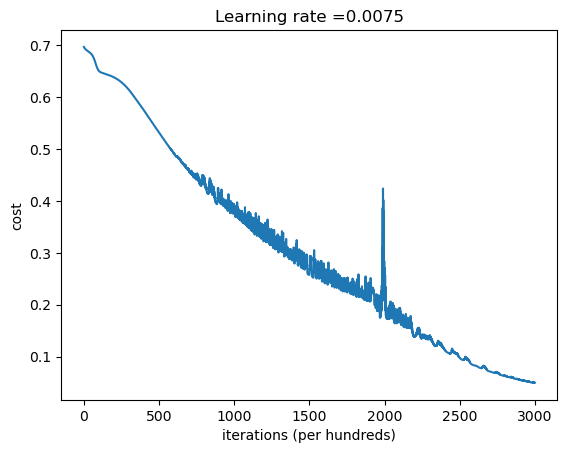

In [22]:
nlp = LLayerModel(train_x, train_y)
nlp.make_layer_dims([7])
nlp.train(3000,0.0075)

In [23]:
nlp.predict(test_x,test_y)

acc 64.97157437695306 %
cost: 1.0018367198319658


iteration 100 /  accuracy:50.81930005806863%
cost:  0.6781358965697708
iteration 200 /  accuracy:51.503002450026955%
cost:  0.6676860067866411
iteration 300 /  accuracy:52.06639678205913%
cost:  0.6604814941528839
iteration 400 /  accuracy:52.53082015692798%
cost:  0.6554991665642119
iteration 500 /  accuracy:52.91420674579418%
cost:  0.6520422350828606
iteration 600 /  accuracy:53.23131526223164%
cost:  0.6496359036388202
iteration 700 /  accuracy:53.49416622977614%
cost:  0.6479557987726234
iteration 800 /  accuracy:53.71250937127754%
cost:  0.6467795101657359
iteration 900 /  accuracy:53.894248740827386%
cost:  0.6459539330393282
iteration 1000 /  accuracy:54.04580196698119%
cost:  0.6453732502156938
iteration 1100 /  accuracy:54.172393884770344%
cost:  0.6449640490193227
iteration 1200 /  accuracy:54.2782919681251%
cost:  0.6446752197785334
iteration 1300 /  accuracy:54.36699375721552%
cost:  0.6444710680307574
iteration 1400 /  accuracy:54.44137524075452%
cost:  0.6443265952850284

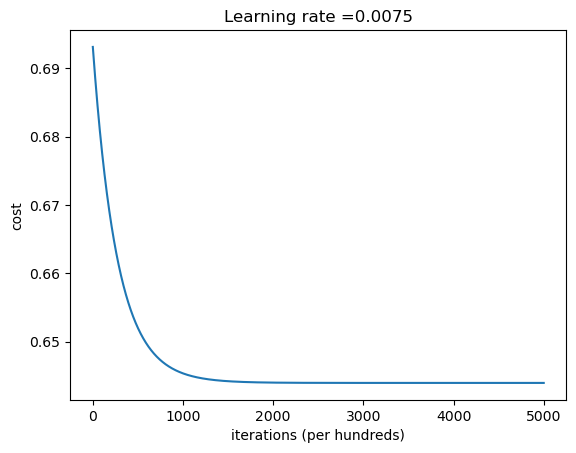

acc 45.02481514848332 %
cost: 0.846902162871137


In [24]:
nlp2 = LLayerModel(train_x,train_y)
nlp2.make_layer_dims([20,7,5])
nlp2.train(5000,0.0075)
nlp2.predict(test_x,test_y)